# # Business Objectives - Credit EDA
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

## Dataset Info
'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.
'previous_application.csv' contains information about the client’s previous loan data. 
It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Loading the datset
new_app = pd.read_csv('application_data.csv')
previous= pd.read_csv('previous_application.csv')

In [3]:
#option used to view all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [74]:
#checking for shape
print(new_app.shape)
print(previous.shape)

(307511, 80)
(1670214, 37)


In [78]:
new_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [79]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [6]:
new_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
#checking  null values are there
new_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
# Print the null percetange of each column of new_app.
percent_missing = new_app.isnull().sum() * 100 / len(new_app)
print(percent_missing)
len(percent_missing)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

122

## Droping the columns which has more than 50% of null values 

In [9]:
#Drop the columns which are not required for analysis IMO
new_app.drop(['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG',
'FLOORSMIN_AVG','LANDAREA_AVG','LANDAREA_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE',
'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMIN_MEDI',               
'LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE',       
'HOUSETYPE_MODE','WALLSMATERIAL_MODE','LIVINGAPARTMENTS_AVG','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMIN_MODE',
'LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI'], axis=1, inplace=True)


Check the shape of the data:

In [10]:
#Check shape of new dataframe after dropping the columns with null values more than 50%
print(new_app.shape)
print(new_app.info())

(307511, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              3

#### There are around 13% of Null values for below columns:
1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK 
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT

As the above columns are of type float, we can impute the null values with median.

In [11]:
print(new_app['AMT_REQ_CREDIT_BUREAU_HOUR'].median())
print(new_app['AMT_REQ_CREDIT_BUREAU_DAY'].median())
print(new_app['AMT_REQ_CREDIT_BUREAU_WEEK'].median())
print(new_app['AMT_REQ_CREDIT_BUREAU_MON'].median())
print(new_app['AMT_REQ_CREDIT_BUREAU_QRT'].median())

0.0
0.0
0.0
0.0
0.0


### Imputing null data with mean/median/mode according to the column values for some columns which are important in analysis

In [12]:
#Find most common values in the columns where null values exist and replace with Mean/Median for numeric values and Mode for categoric values
new_app['AMT_ANNUITY']=new_app['AMT_ANNUITY'].fillna(new_app['AMT_ANNUITY'].median())
new_app['AMT_GOODS_PRICE']=new_app['AMT_GOODS_PRICE'].fillna(new_app['AMT_GOODS_PRICE'].mean())

In [13]:
#Checking the null values after imputation
new_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

#### We still have null values in some of the columns but we will not be using them in our analysis. So, not imputing the null values anymore.


In [14]:
# Replacing XNA from few columns, since they are very less in number
print(new_app['CODE_GENDER'].value_counts())
print(new_app['ORGANIZATION_TYPE'].value_counts())

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   157

In [15]:
# Fixing those values with other most relevant value
new_app['CODE_GENDER'] = new_app['CODE_GENDER'].replace(['XNA'],['F'])
new_app['ORGANIZATION_TYPE']=new_app['ORGANIZATION_TYPE'].replace(['XNA'],['Business Entity Type 3'])

In [16]:
# Converting all variable into numeric in the dataset

num = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

new_app[num]=new_app[num].apply(pd.to_numeric)
new_app.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0=new_app.loc[new_app["TARGET"]==0]
target1=new_app.loc[new_app["TARGET"]==1]

### Create Matrices for Analysis with help of bin

In [18]:
# Creating bins for income amount of people
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
slot = ['0-50000','50000-100000','100000-150000', '150000-200000',
       '200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']
target0['AMT_INCOME_RANGE']=pd.cut(target0['AMT_INCOME_TOTAL'],bins,labels=slot)
target1['AMT_INCOME_RANGE']=pd.cut(target1['AMT_INCOME_TOTAL'],bins,labels=slot)

### Check Data Imbalance

In [19]:
# % Imbalance Check
100*new_app['TARGET'].value_counts(normalize=True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [20]:
# Since the majority is target0 and minority is target1
round(len(target0)/len(target1),2)

11.39

### Bar Graph to just compare the target components

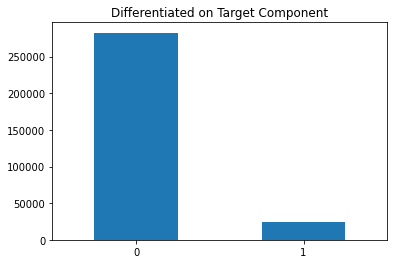

In [21]:
plt.title('Differentiated on Target Component')
new_app['TARGET'].value_counts().plot(kind='bar', rot=0)
plt.show()

# Data Analysis

### Univariate analysis on New Application Data for Both Target0 and Target1

#### Continuous Variable
IMO, we can do numeric analysis based on below columns:

    1.AMT_INCOME_TOTAL
    2.AMT_CREDIT
    3.AMT_ANNUITY
    4.AMT_GOODS_PRICE
    5.AMT_REQ_CREDIT_BUREAU_YEAR

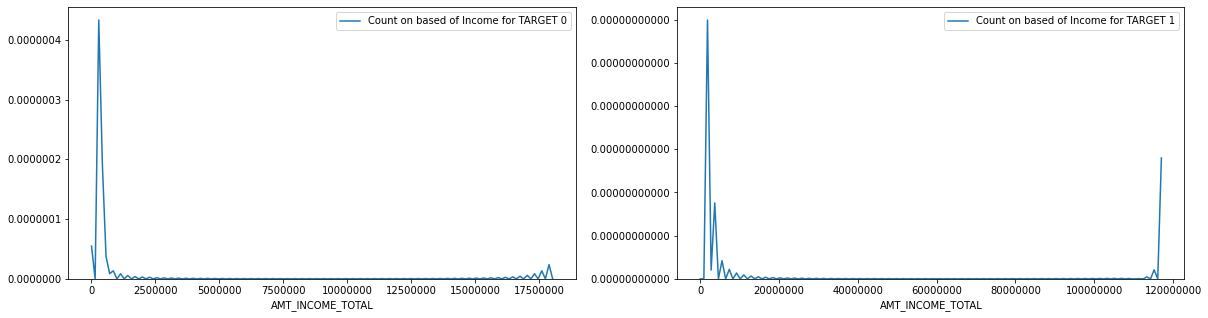

In [22]:
# Analysis based on total income for target 0 and 1
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.ticklabel_format(useOffset=False, style='plain')
sns.distplot(target0['AMT_INCOME_TOTAL'], hist=False, label = 'Count on based of Income for TARGET 0') 
plt.subplot(1,2,2)
plt.ticklabel_format(useOffset=False, style='plain')
sns.distplot(target1['AMT_INCOME_TOTAL'], hist=False, label = 'Count on based of Income for TARGET 1') 
plt.show()

Total Income shows normal distribution for both target values. 
1. TARGET 0- Most of the loan applicants have income between 0-2500000. Some applicants have 0 income.
2. TARGET 1- Most of the loan applicants have income between 0-20000000 being maximum applicants close to 0 or quite less income.
    -Both TARGET 0 and TARGET 1 has outliers with higher income.

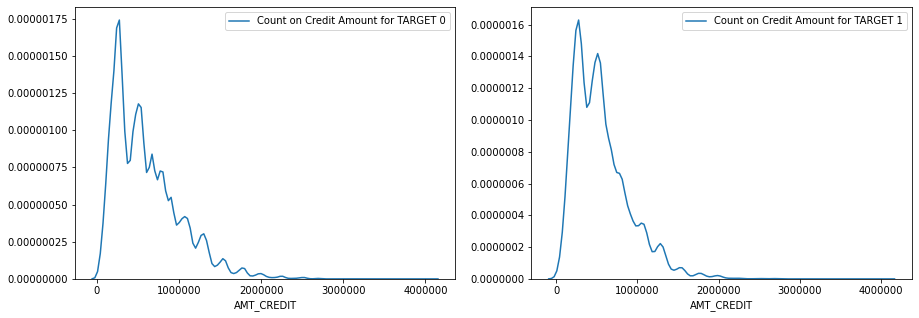

In [23]:
# Analysis based on Credit Amount for target 0 and 1
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(useOffset=False, style='plain')
sns.distplot(target0['AMT_CREDIT'], hist=False, label = 'Count on Credit Amount for TARGET 0') 
plt.subplot(1,2,2)
plt.ticklabel_format(useOffset=False, style='plain')
sns.distplot(target1['AMT_CREDIT'], hist=False, label = 'Count on Credit Amount for TARGET 1')
plt.show()

* The above distribution graph for AMT_CREDIT are normally distributed and shows that:
  TARGET 0- Most of the applicants have requested credit amount between 0-500000.
  TARGET 1- Most applicants have requested creadit between 0-1000000.

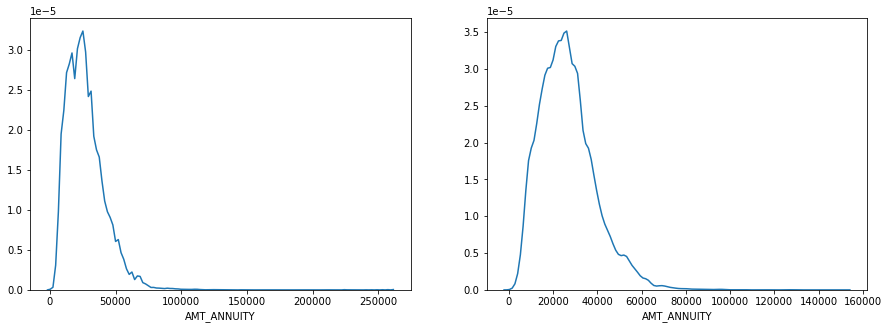

In [24]:
# Analysis based on EMI Amount for target 0 and 1
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(target0['AMT_ANNUITY'], hist=False) 
plt.subplot(1,2,2)
sns.distplot(target1['AMT_ANNUITY'], hist=False) 
plt.show()

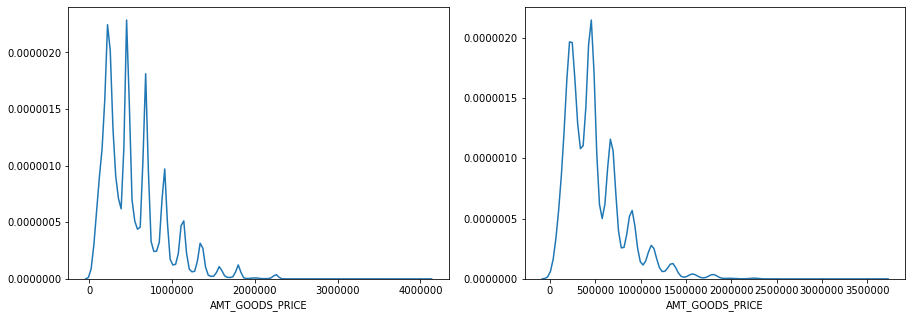

In [25]:
# Analysis based on GOODS PRICE for target 0 and 1
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(useOffset=False, style='plain')
sns.distplot(target0['AMT_GOODS_PRICE'], hist=False) 
plt.subplot(1,2,2)
plt.ticklabel_format(useOffset=False, style='plain')
sns.distplot(target1['AMT_GOODS_PRICE'], hist=False)
plt.show()

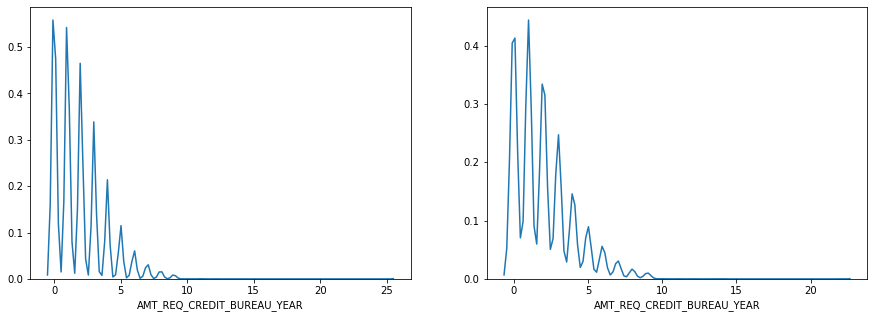

In [26]:
# Analysis based on Credit required on yearly for target 0 and 1
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(target0['AMT_REQ_CREDIT_BUREAU_YEAR'], hist=False) 
plt.subplot(1,2,2)
sns.distplot(target1['AMT_REQ_CREDIT_BUREAU_YEAR'], hist=False)
plt.show()

## Checking for Outliers

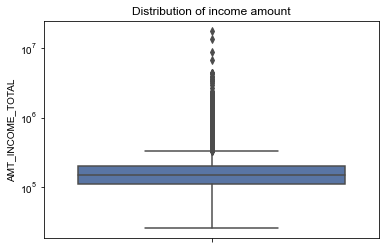

In [27]:
# Distribution of income amount for target0
plt.title('Distribution of income amount')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
sns.boxplot(data=target0,y='AMT_INCOME_TOTAL')
plt.show()

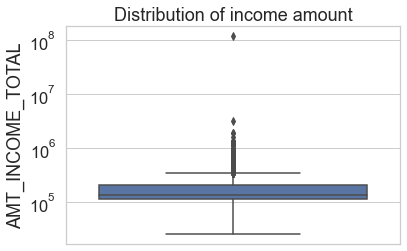

In [28]:
# Distribution of income amount for target1
plt.title('Distribution of income amount')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
sns.boxplot(data=target1,y='AMT_INCOME_TOTAL')
plt.show()

In both of target variable, 2nd Quartile is smaller than 3rd Quartile

And the outliers are continuous in nature, that means there are few people with more Income Amount than rest, which is quite normal


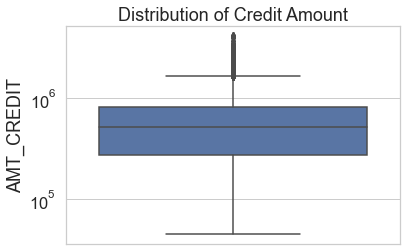

In [29]:
# Disrtibution of credit amount for target0
plt.title('Distribution of Credit Amount')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
sns.boxplot(data=target0,y='AMT_CREDIT')
plt.show()

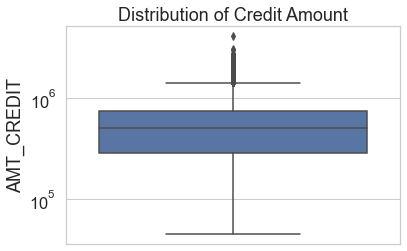

In [30]:
# Disrtibution of credit amount for target1
plt.title('Distribution of Credit Amount')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
sns.boxplot(data=target1,y='AMT_CREDIT')
plt.show()

In both of target variable, 3rd Quartile is smaller than 2nd Quartile, which means more people falls under asking range of average credit amount

And the outliers are continuous in nature, that means there are few people asking for more Credit Amount than rest, which is quite normal


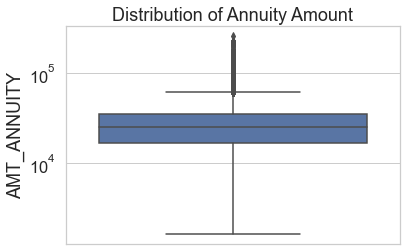

In [31]:
# Disrtibution of EMI Amount for target0
plt.title('Distribution of Annuity Amount')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
sns.boxplot(data=target0,y='AMT_ANNUITY')
plt.show()

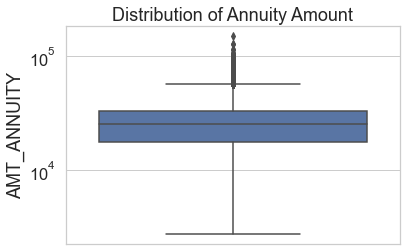

In [32]:
# Disrtibution of EMI Amount for target1
plt.title('Distribution of Annuity Amount')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
sns.boxplot(data=target1,y='AMT_ANNUITY')
plt.show()

In both of target variable, 3rd Quartile is smaller than 2nd Quartile, which means more people falls under asking range of average credit amount

And the outliers are continuous in nature, that means there are few people asking for more Credit Amount than rest, which is quite normal

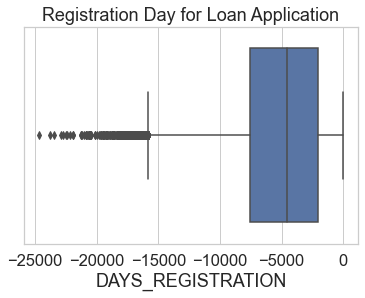

In [33]:
# Disrtibution of Registration Day for target0
plt.title('Registration Day for Loan Application')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
sns.boxplot(data=target0,x='DAYS_REGISTRATION')
plt.show()

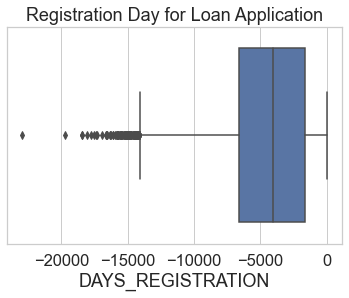

In [34]:
# Disrtibution of Registration Day for target1
plt.title('Registration Day for Loan Application')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
sns.boxplot(data=target1,x='DAYS_REGISTRATION')
plt.show()

Here, Pretty much 2nd and 3rd Quartile is same
The Outliers in this graph represent that for both target variable date of appliying for loan

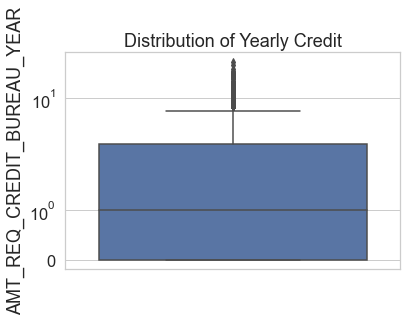

In [35]:
# Disrtibution of Yearly Credit Request for target0
plt.title('Distribution of Yearly Credit')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
sns.boxplot(data=target0,y='AMT_REQ_CREDIT_BUREAU_YEAR')
plt.show()

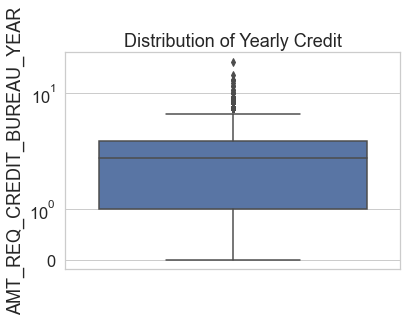

In [36]:
# Disrtibution of Yearly Credit Request for target1
plt.title('Distribution of Yearly Credit')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
sns.boxplot(data=target1,y='AMT_REQ_CREDIT_BUREAU_YEAR')
plt.show()

In both of target variable, 3rd Quartile is smaller than 2nd Quartile

And the outliers are continuous in nature, that means there are few people with high amount request for yearly payment, which is quite normal

## Univariate Analysis on Categorical Variable on both target values
IMO, we can do categorical analysis based on below columns:
    1. Gender
    2. Occupation
    3. Income Range
    4. Education
    5. Family Status

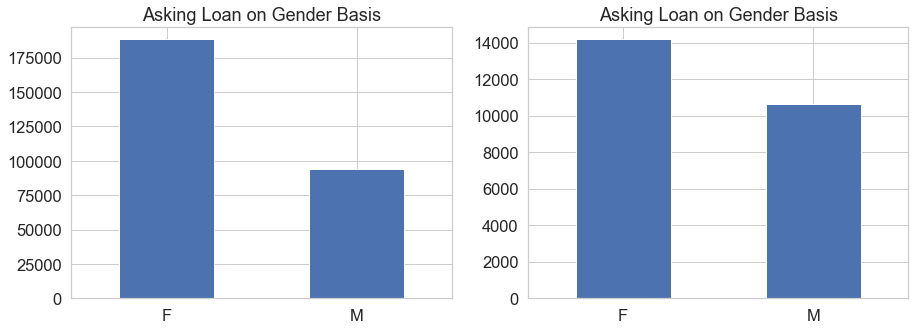

In [37]:
#Check the gender for applicant
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Asking Loan on Gender Basis')
target0['CODE_GENDER'].value_counts().plot(kind='bar', rot=0)
plt.subplot(1,2,2)
plt.title('Asking Loan on Gender Basis')
target1['CODE_GENDER'].value_counts().plot(kind='bar', rot=0)
plt.show()

The above graph implies that Female loan applicants are more than Male in both target range

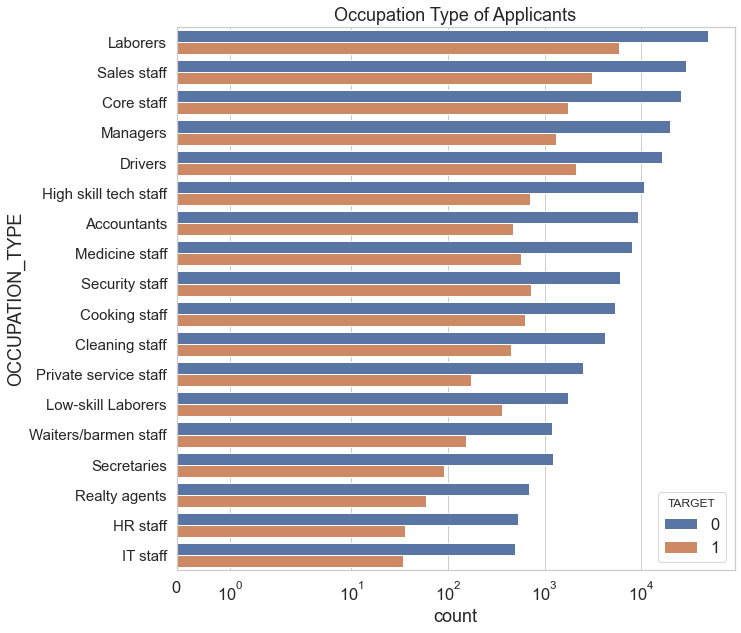

In [38]:
#Check the occupation for applicant for target0 and target1
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5, style='whitegrid')
plt.xscale('symlog')
plt.yticks(fontsize= 15)
plt.title('Occupation Type of Applicants')
sns.countplot(data=new_app,y='OCCUPATION_TYPE', order=new_app['OCCUPATION_TYPE'].value_counts().index, hue='TARGET')
plt.show()

Here we can see that:
    
    Labors are more in number of having Loan Payment Issues
    Whereas IT staffs are most reliable in loan payent
    Like Target0, highest and lowest occupation is same, but in few occupation type: Manager, Driver, Private Service staff the data shows trend has changed a bit
    So need to watch these sections

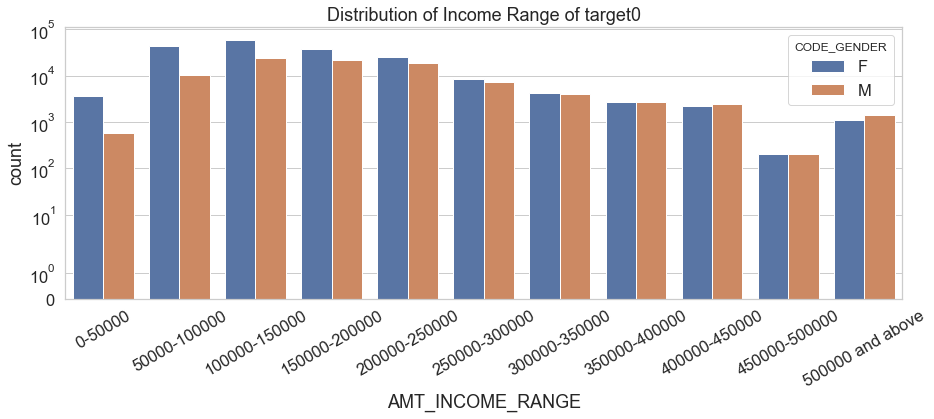

In [39]:
#lets plot a graph on terms of Income Range for Both Gender in target0
plt.figure(figsize=(15,5))
plt.title('Distribution of Income Range of target0')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
plt.xticks(rotation=30)
sns.countplot(data=target0,x='AMT_INCOME_RANGE', hue = 'CODE_GENDER')
plt.show()

Here we can say that, Female has higher income range till 350000 and after that Male dominated the higher salary range
So bank should avoid giving high values loans to Female. 

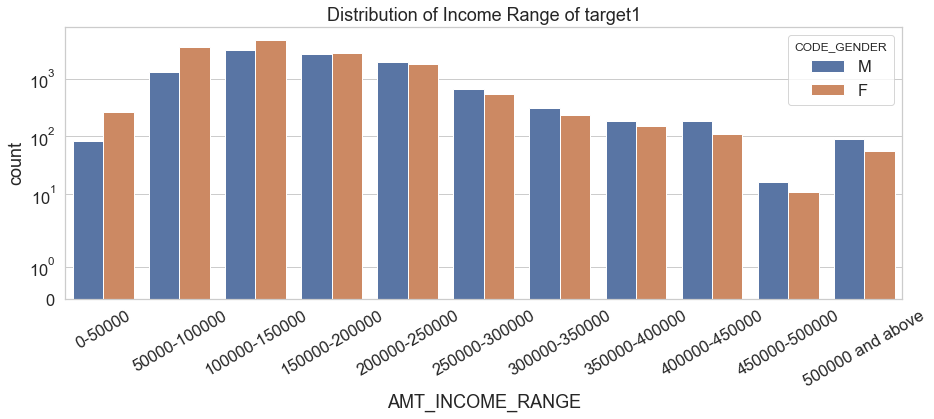

In [40]:
#lets plot a graph on terms of Income Range for Both Gender in target1
plt.figure(figsize=(15,5))
plt.title('Distribution of Income Range of target1')
sns.set(style='whitegrid', font_scale = 1.5)
plt.yscale('symlog')
plt.xticks(rotation=30)
sns.countplot(data=target1,x='AMT_INCOME_RANGE', hue = 'CODE_GENDER')
plt.show()

Here after comparing target0 and target1 plot, we can say that
    
    This also follow the same order of income divide between Male and Female, So its should be monitored properly

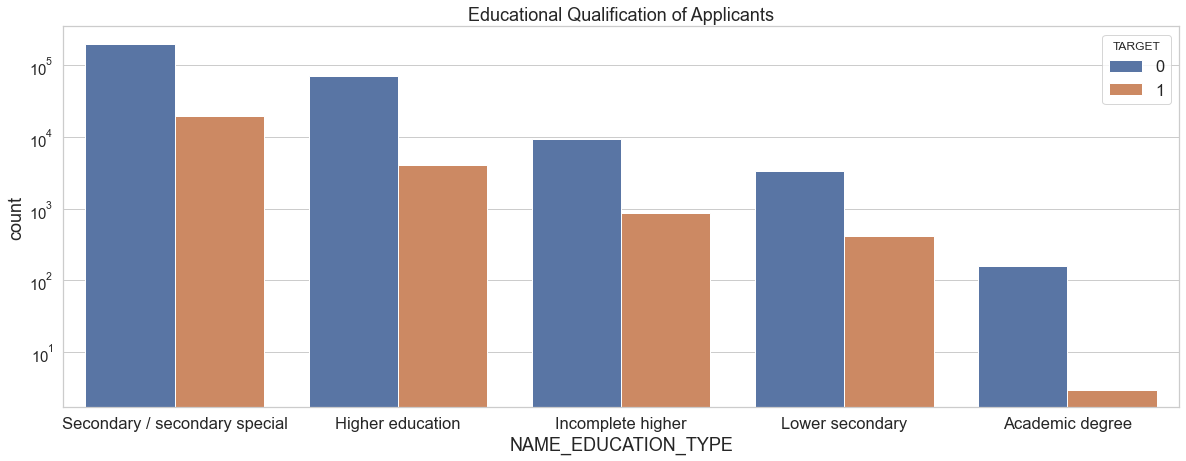

In [41]:
#Check the Education for applicant for target0 and target1
plt.figure(figsize=(20,7))
sns.set(font_scale=1.5, style='whitegrid')
plt.yscale('log')
plt.yticks(fontsize= 15)
plt.title('Educational Qualification of Applicants')
sns.countplot(data=new_app, x='NAME_EDUCATION_TYPE',order=new_app['NAME_EDUCATION_TYPE'].value_counts().index, hue="TARGET")
plt.show()

Here we can say that, on education type in both of target component less educated people are more prone to have defaults in their payment of loans

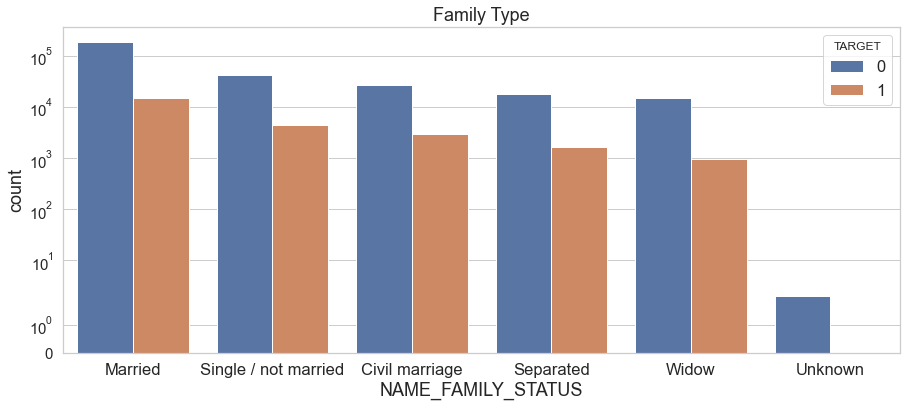

In [42]:
#Check the Family type for applicant for target0 and target1
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5, style='whitegrid')
plt.yticks(fontsize= 15)
plt.yscale('symlog')
plt.title('Family Type')
sns.countplot(data=new_app, x='NAME_FAMILY_STATUS',order=new_app['NAME_FAMILY_STATUS'].value_counts().index, hue= "TARGET")
plt.show()

## Bivariate Analysis

### Continuous - Continuous Variable Analysis
1. Credit and Income
2. Credit and Goods Amount
3. Income and Annuity
4. Goods Price and Annuity

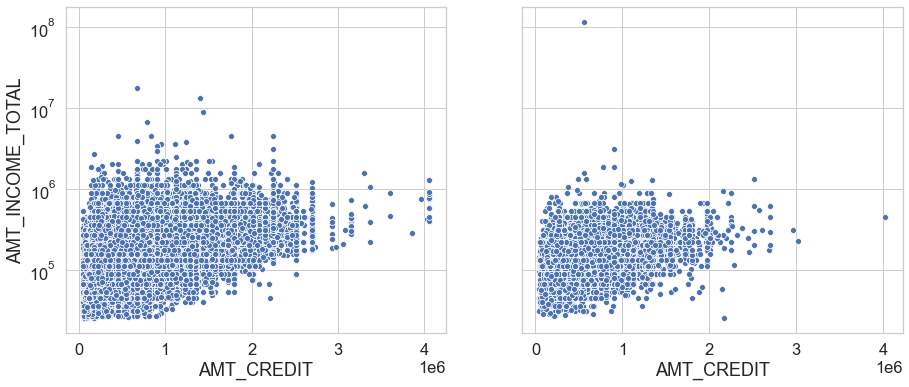

In [43]:
#plot the scatter plot of INCOME and CREDIT variable for both target0 and target1
fig , ax = plt.subplots(ncols = 2, figsize=[15,6], sharey=True)
plt.yscale('log')
sns.scatterplot(target0['AMT_CREDIT'], target0['AMT_INCOME_TOTAL'], ax = ax[0])
sns.scatterplot(target1['AMT_CREDIT'], target1['AMT_INCOME_TOTAL'], ax = ax[1])
plt.show()

    Here Graph says that, with increasing income the credit amount also increases.
    Few Outliers are there, so bank should compare income of applicant before giving credit

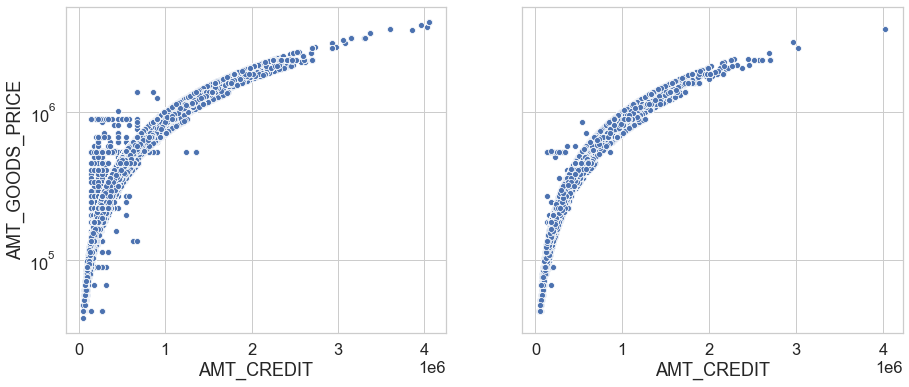

In [44]:
#plot the scatter plot of Credit and Goods variable for both target0 and target1
fig , ax = plt.subplots(ncols = 2, figsize=[15,6], sharey=True)
plt.yscale('log')
sns.scatterplot(target0['AMT_CREDIT'], target0['AMT_GOODS_PRICE'], ax = ax[0])
sns.scatterplot(target1['AMT_CREDIT'], target1['AMT_GOODS_PRICE'], ax = ax[1])
plt.show()

    Here Graph says that, valuation of goods owned by applicant is directly proportinal to credit they own

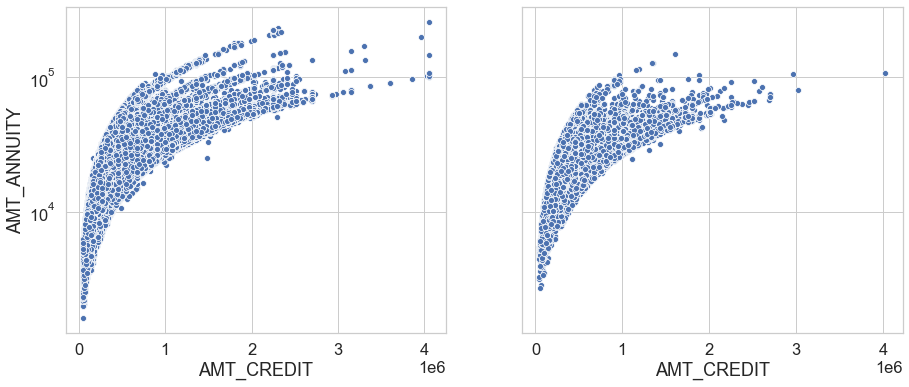

In [45]:
#plot the scatter plot of CREDIT and Annuity variable for both target0 and target1
fig , ax = plt.subplots(ncols = 2, figsize=[15,6], sharey=True)
plt.yscale('log')
sns.scatterplot(target0['AMT_CREDIT'], target0['AMT_ANNUITY'], ax = ax[0])
sns.scatterplot(target1['AMT_CREDIT'], target1['AMT_ANNUITY'], ax = ax[1])
plt.show()

    Both target variable graphs are pretty much same, so same strategy will work for deciding weather the EMI will be paid a particular Credit Amount 

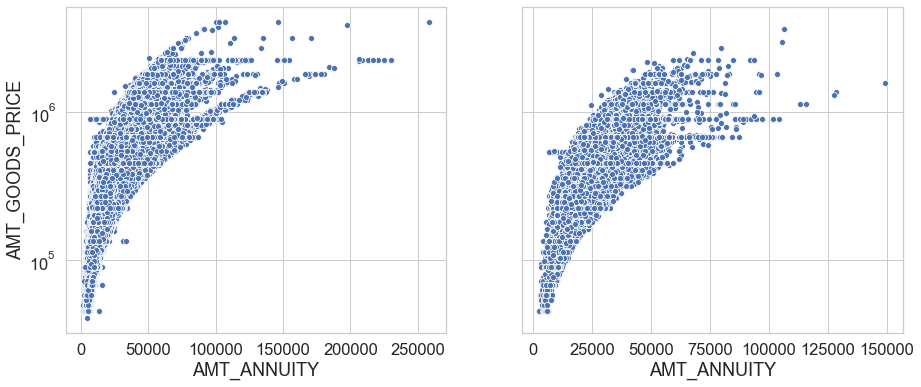

In [46]:
#plot the scatter plot of Annuity and Goods variable for both target0 and target1
fig , ax = plt.subplots(ncols = 2, figsize=[15,6], sharey=True)
plt.yscale('log')
sns.scatterplot(target0['AMT_ANNUITY'], target0['AMT_GOODS_PRICE'], ax = ax[0])
sns.scatterplot(target1['AMT_ANNUITY'], target1['AMT_GOODS_PRICE'], ax = ax[1])
plt.show()

    Graph Shows that EMI  and the Value of Goods owned by the Applicant is also quite similar in both cases

## Catagorical-Continuous Variable Analysis
    1.CODE_GENDER and AMT_CREDIT
    2.NAME_INCOME_TYPE and AMT_CREDIT
    3.NAME_EDUCATION_TYPE and AMT_CREDIT
    4.NAME_FAMILY_STATUS and AMT_CREDIT
    5.NAME_HOUSING_TYPE  and AMT_CREDIT

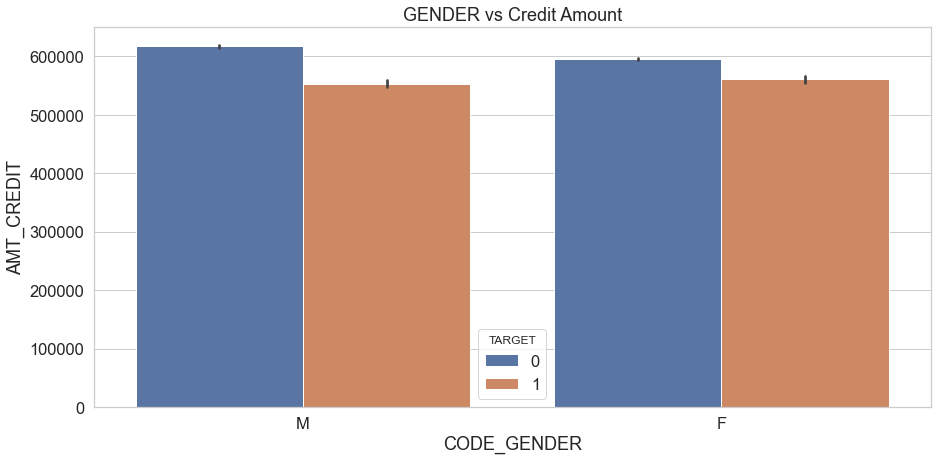

In [47]:
# Comparison on target0 and target1 for CODE_GENDER to AMT_CREDIT
plt.figure(figsize=(15,7))
sns.set(style='whitegrid', font_scale = 1.5)
sns.barplot(x='CODE_GENDER',  y='AMT_CREDIT', data =new_app, hue='TARGET')
plt.title('GENDER vs Credit Amount')
plt.show()

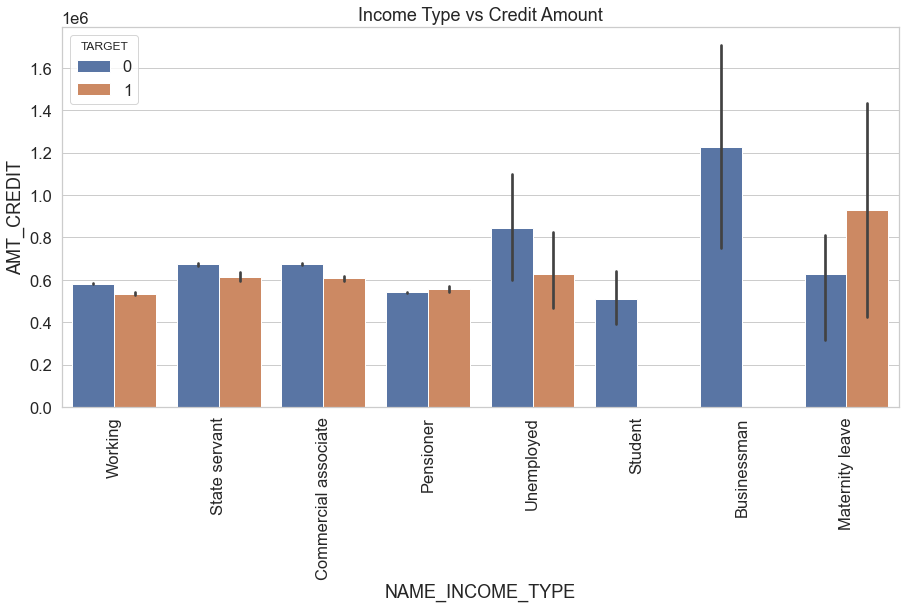

In [48]:
# Comparison on target0 and target1 for NAME_INCOME_TYPE to AMT_CREDIT
plt.figure(figsize=(15,7))
sns.set(style='whitegrid', font_scale = 1.5)
plt.xticks(rotation=90)
sns.barplot(x='NAME_INCOME_TYPE',  y='AMT_CREDIT', data =new_app, hue='TARGET')
plt.title('Income Type vs Credit Amount')
plt.show()

Bussinessman ask for more Loan Credit Amount

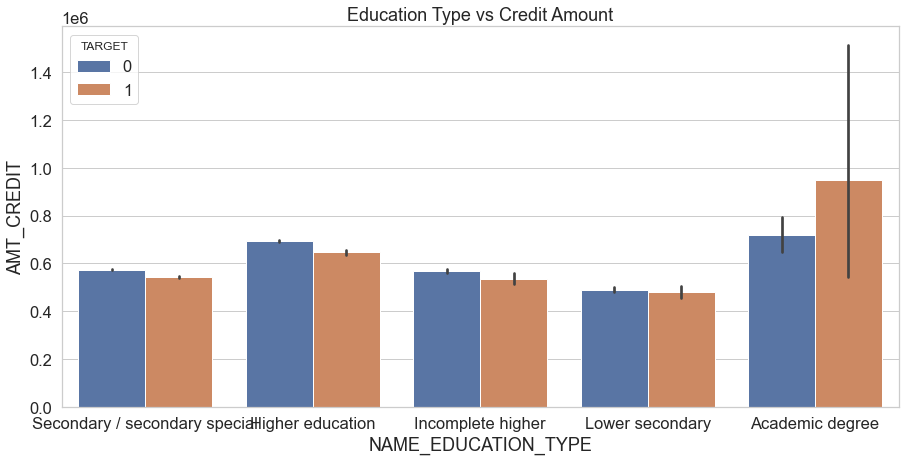

In [49]:
# Comparison on target0 and target1 for NAME_EDUCATION_TYPE to AMT_CREDIT
plt.figure(figsize=(15,7))
sns.set(style='whitegrid', font_scale = 1.5)
sns.barplot(x='NAME_EDUCATION_TYPE',  y='AMT_CREDIT', data =new_app, hue='TARGET')
plt.title('Education Type vs Credit Amount')
plt.show()

Academic Degre Holders ask for More Loan Credit

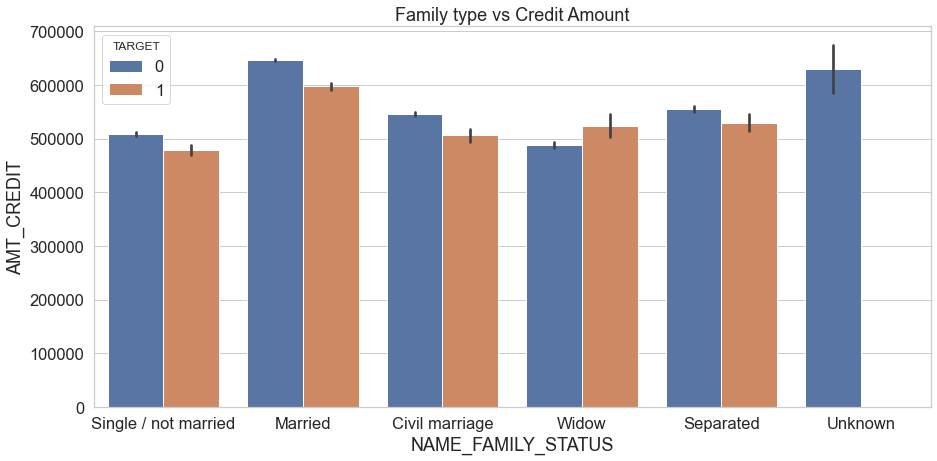

In [50]:
# Comparison on target0 and target1 for NAME_FAMILY_STATUS to AMT_CREDIT
plt.figure(figsize=(15,7))
sns.set(style='whitegrid', font_scale = 1.5)
sns.barplot(x='NAME_FAMILY_STATUS',  y='AMT_CREDIT', data =new_app, hue='TARGET')
plt.title('Family type vs Credit Amount')
plt.show()

Married Poeple are the ones who ask for More Loan Credit

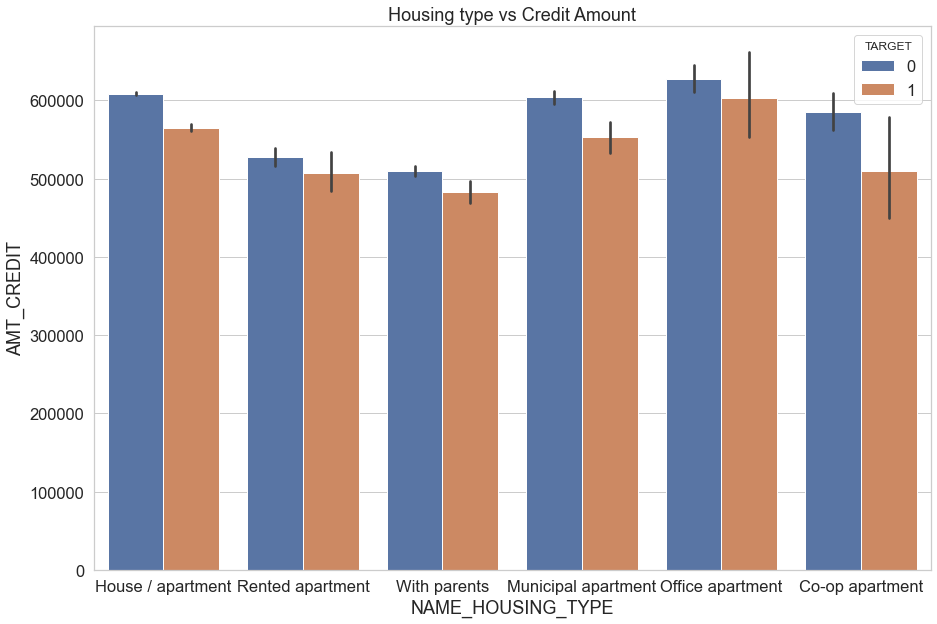

In [51]:
# Box plotting for Credit amount vs Housing type
plt.figure(figsize=(15,10))
sns.set(style='whitegrid', font_scale = 1.5)
sns.barplot(x='NAME_HOUSING_TYPE',  y='AMT_CREDIT', data =new_app, hue='TARGET')
plt.title('Housing type vs Credit Amount')
plt.show()

People from Office Appartment ask for most Loan Credit

### Catagorical-Catagorical Variable Analysis
1. TARGET vs Gender
2. TARGET vs Occupation Type
3. TARGET vs Housing Type
4. TARGET vs Education Type
5. Occupation Type vs Education Type

In [52]:
new_app['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [53]:
#calculate the mean of TARGET
new_app['TARGET'].mean()

0.08072881945686496

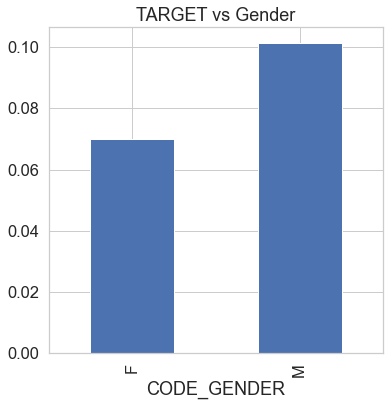

In [54]:
#calculate the mean of TARGET with different education categories.
plt.figure(figsize=(6,6))
plt.title('TARGET vs Gender')
new_app.groupby('CODE_GENDER')['TARGET'].mean().plot.bar()
plt.show()

The above graph clearly implies that Male applicants have more difficulty in paying back the loan.

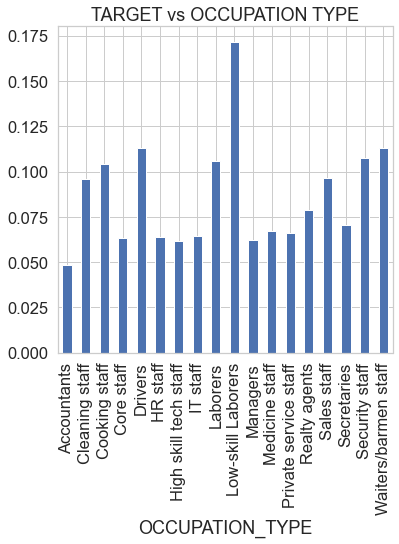

In [55]:
#compare TARGET with different OCCUPATION categories.
plt.figure(figsize=(6,6))
plt.title('TARGET vs OCCUPATION TYPE')
new_app.groupby('OCCUPATION_TYPE')['TARGET'].mean().plot.bar()
plt.show()

The above graph implies that Low-skill Laborers have the most difficluty in paying back the loan amount whereas Accountants are
the least in number with payment difficulty.

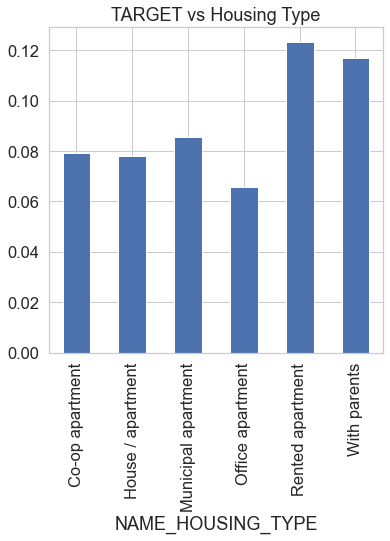

In [56]:
#compare TARGET with different Housing Type categories.
plt.figure(figsize=(6,6))
plt.title('TARGET vs Housing Type')
new_app.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().plot.bar()
plt.show()

The above graph indicates that applicants living in Rented apartment or with parents have the most difficulty in payment.

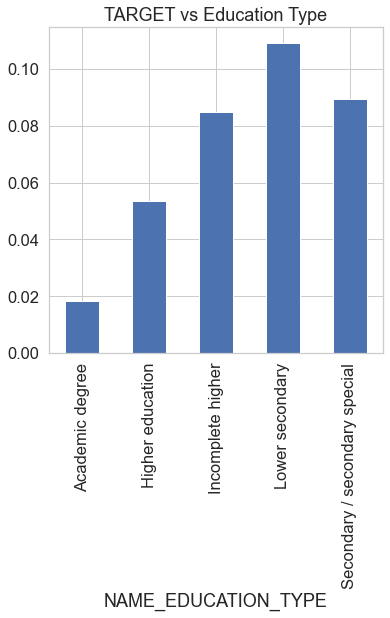

In [57]:
plt.figure(figsize=(6,6))
plt.title('TARGET vs Education Type')
new_app.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().plot.bar()
plt.show()

As per the above graph, lower secondary has the highest rate of payment difficulties followed by Secondary/secondary special. 
Academic degree holder applicants have the lowest chances of being defaulter as they have the least payment difficulty.

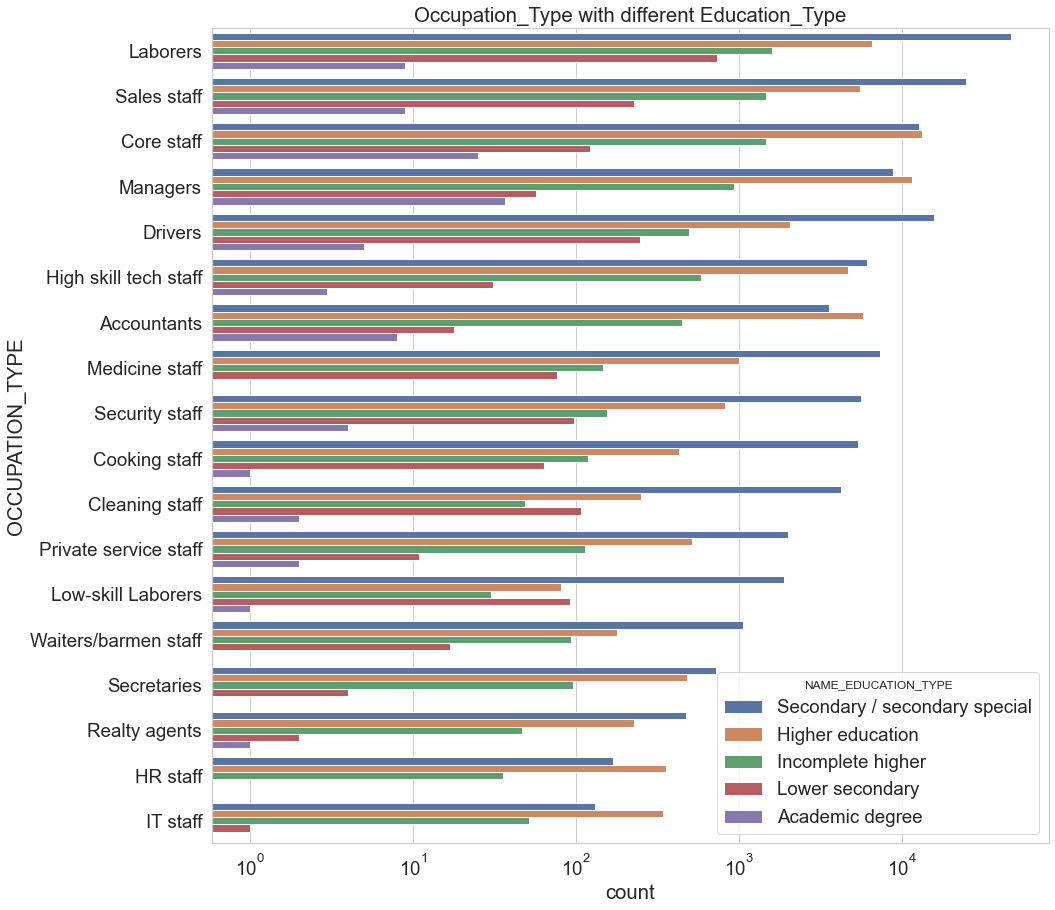

In [58]:
#Compare OCCUPATION_TYPE with different Education categories.
plt.figure(figsize=(15,15))
sns.set(style='whitegrid', font_scale = 1.7)
plt.title("Occupation_Type with different Education_Type")
plt.xscale('log')
sns.countplot(data=new_app,y='OCCUPATION_TYPE', order=new_app['OCCUPATION_TYPE'].value_counts().index, hue='NAME_EDUCATION_TYPE')

The above graph tells that maximum clients with Occupation type Laborers are with Education Secondary/Secondary Special.

## Lets Merge New application file and Previous application file to get an idea about defaulter from previous loan applicants

In [59]:
new_credit = pd.merge(left=new_app,right=previous,how='inner',on='SK_ID_CURR',suffixes='_x')

In [60]:
#Check shape of the new dataframe after merging
new_credit.shape

(1413701, 116)

In [61]:
new_credit.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS

In [62]:
# Rename the column after merging

new_credit_data = new_credit.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_credit_data.shape

(1413701, 116)

In [63]:
# removing unwanted rows with 'XNA' and 'XAP' values
new_credit_data=new_credit_data.drop(new_credit_data[new_credit_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
new_credit_data=new_credit_data.drop(new_credit_data[new_credit_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
new_credit_data.shape

(59413, 116)

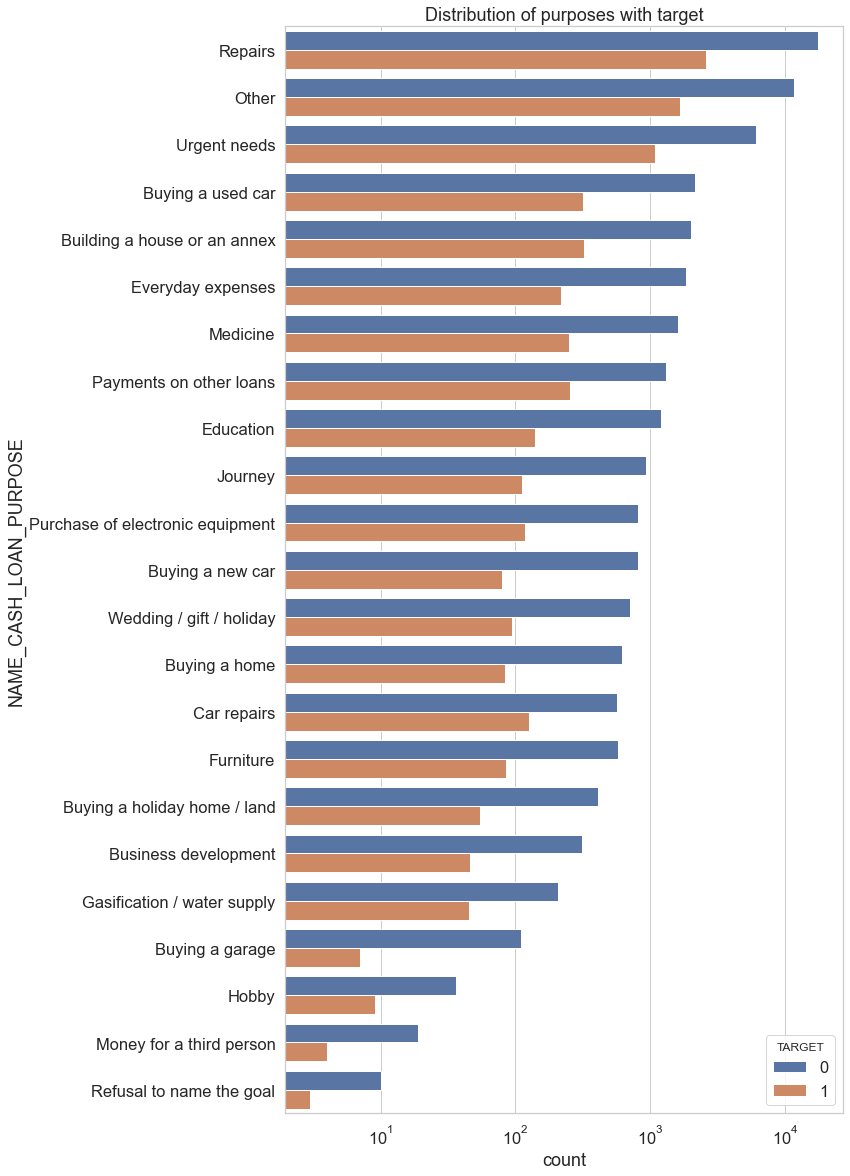

In [64]:
plt.figure(figsize=(10,20))
sns.set(style='whitegrid', font_scale = 1.5)
plt.xscale('log')
plt.title('Distribution of purposes with target')
sns.countplot(data = new_credit_data, y= 'NAME_CASH_LOAN_PURPOSE', order=new_credit_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',)
plt.show()

From Above Plot:

     Repairs have most number of cancelled loan applications.
     Approved and Refused are pretty much equal for education purposes section

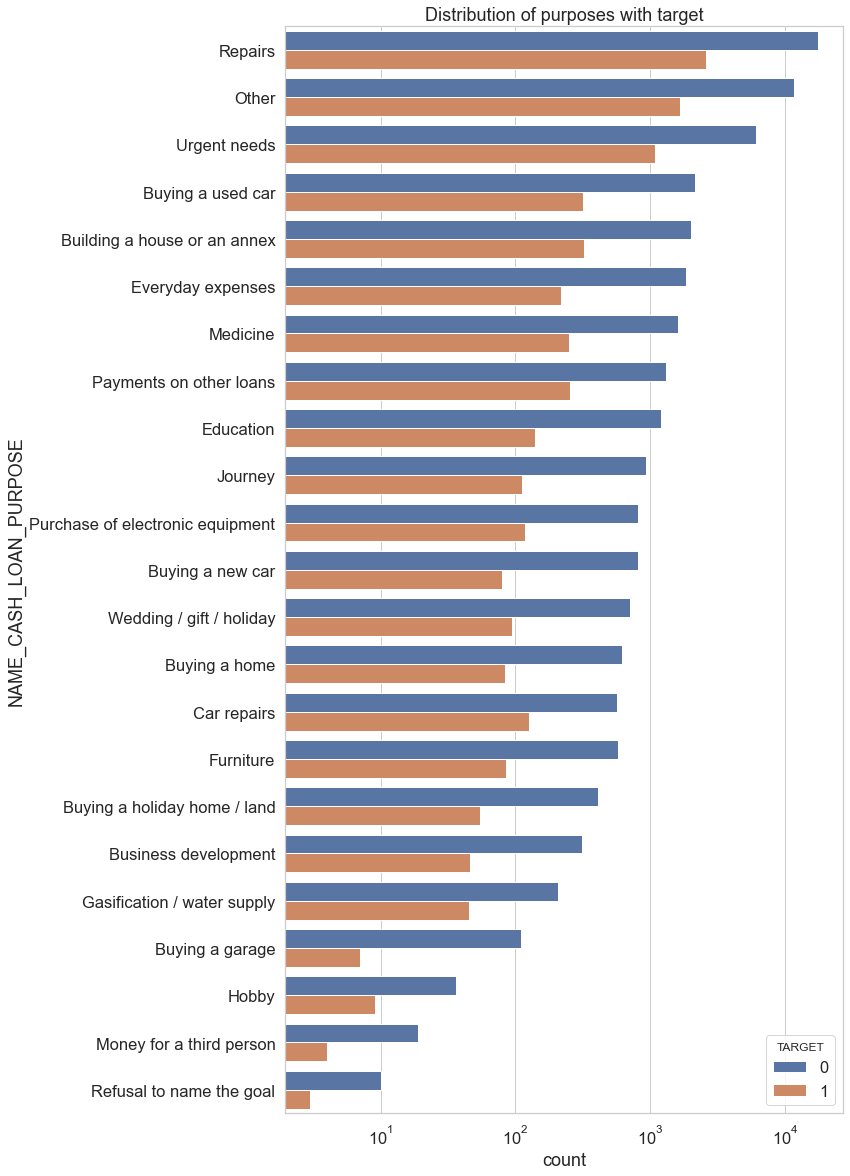

In [65]:
# Distribution of Loan Purpose on Basis of Target 0 and 1
plt.figure(figsize=(10,20))
sns.set(style='whitegrid', font_scale = 1.5)
plt.xscale('log')
plt.title('Distribution of purposes with target')
sns.countplot(data = new_credit_data, y= 'NAME_CASH_LOAN_PURPOSE', order=new_credit_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',)
plt.show()

Conclusion from above plot:

    'Repairs' are highest for facing difficulites in payment on time.

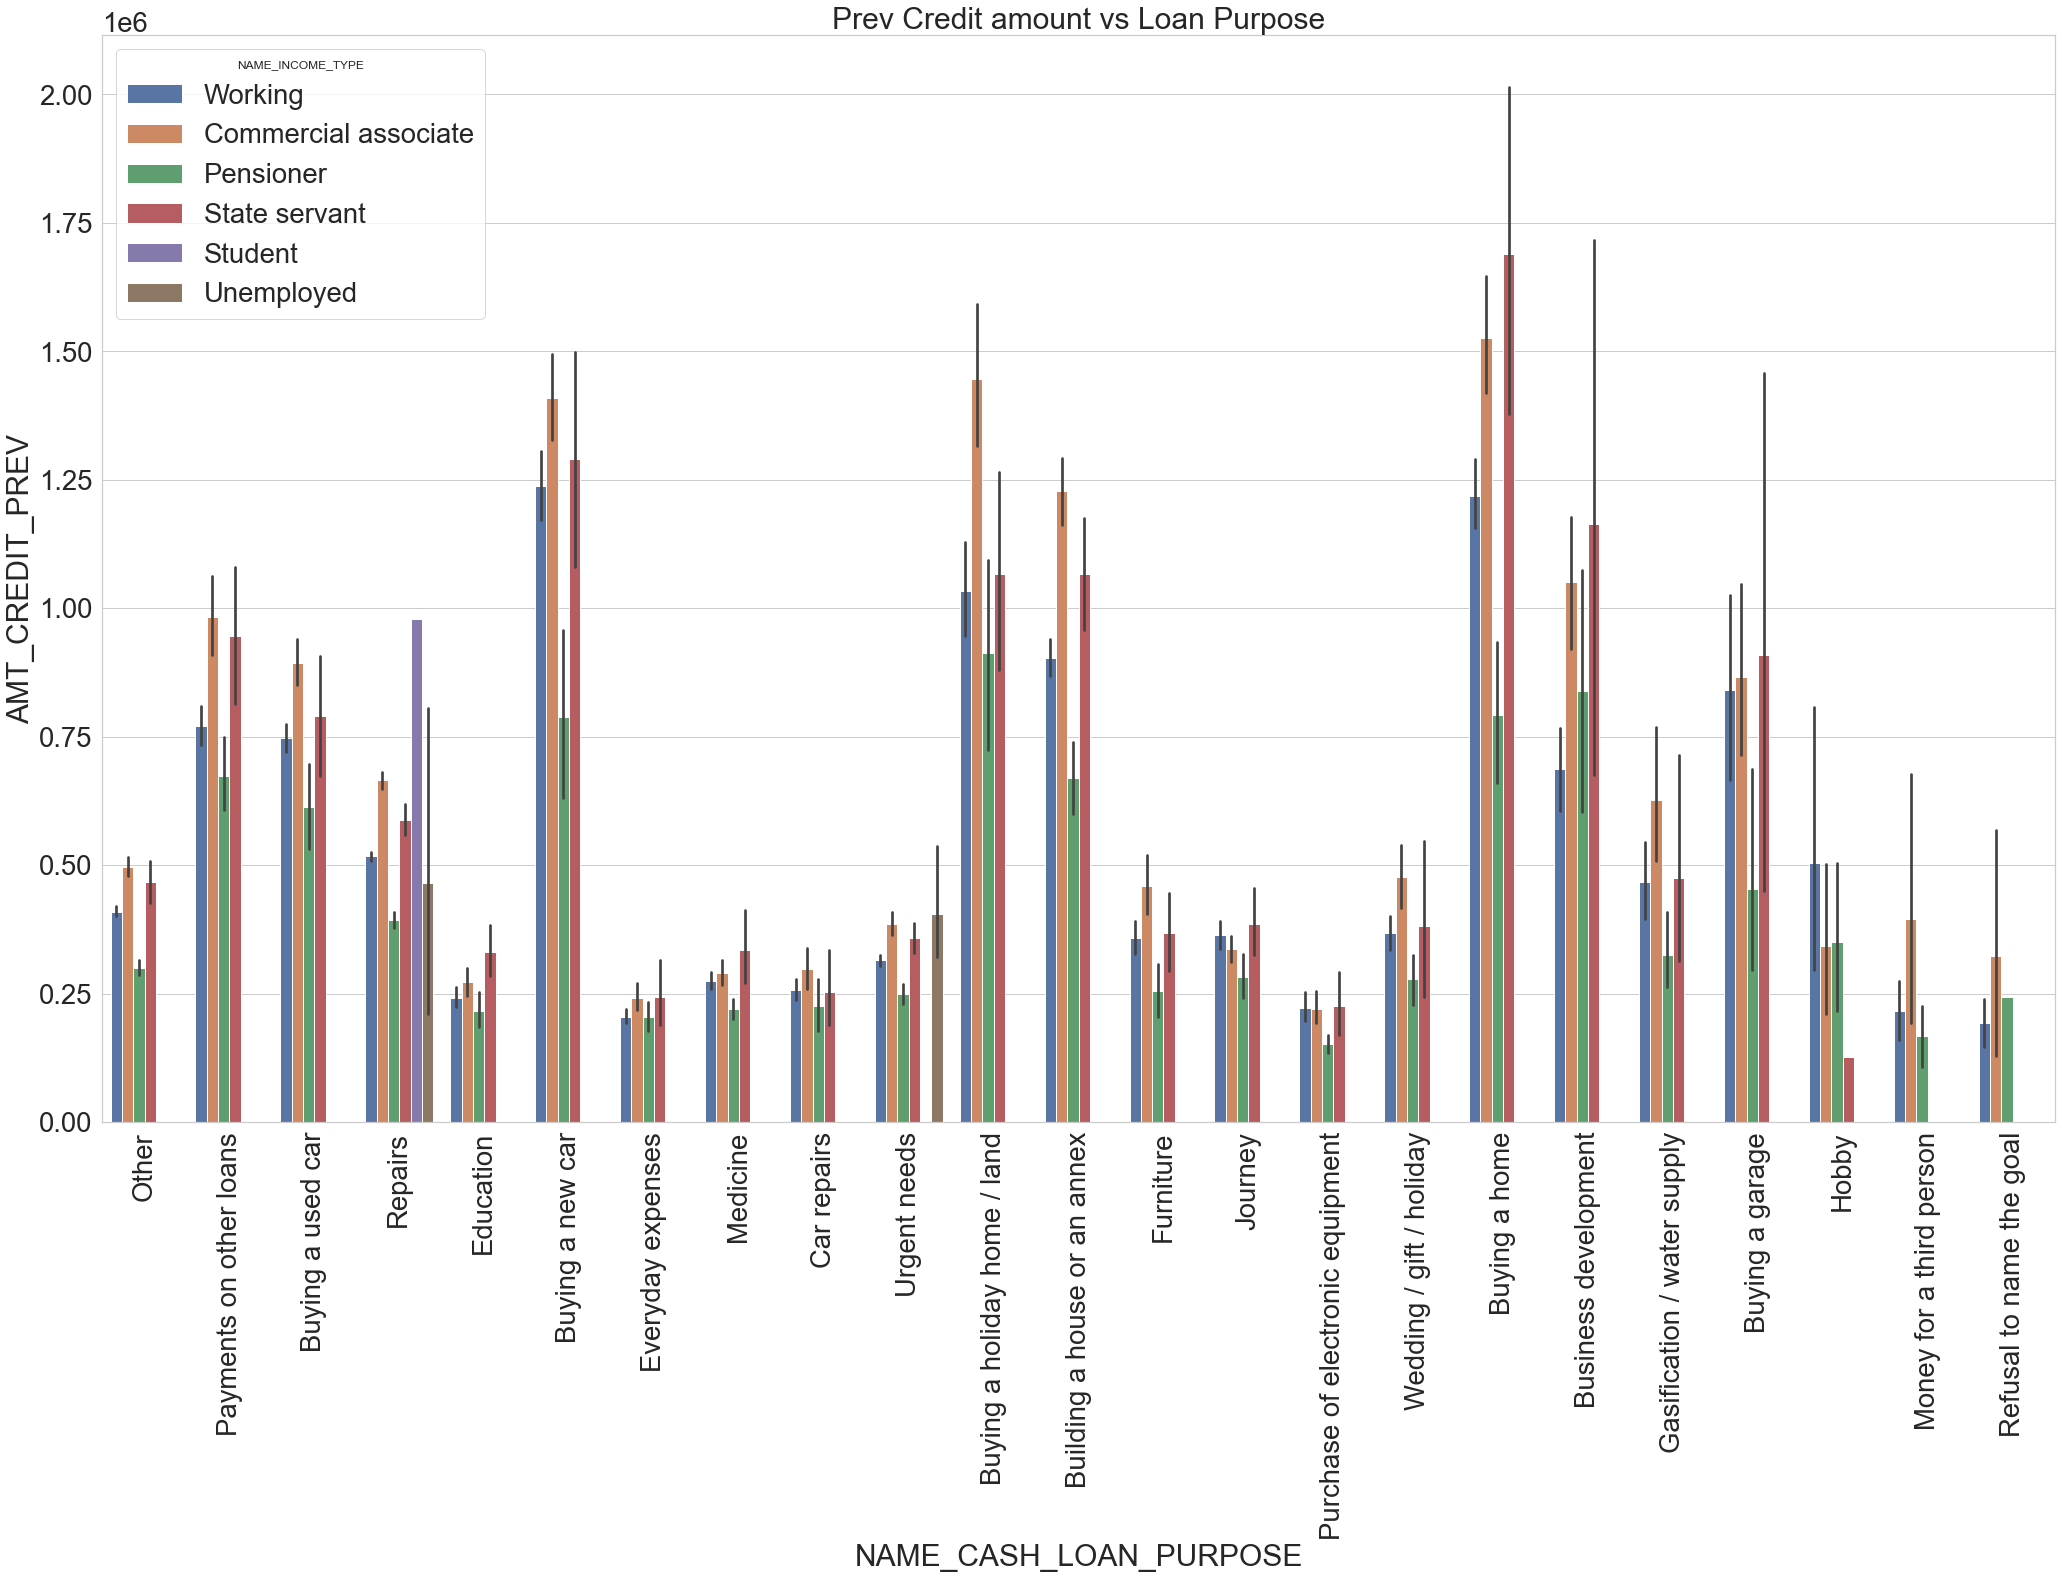

In [66]:
#barplot to see what is purpose of loans and which Income type have applied for credit
sns.set(style='whitegrid', font_scale = 2.5)
plt.figure(figsize=(35,20))
plt.xticks(rotation=90)
plt.title('Prev Credit amount vs Loan Purpose')
sns.barplot(data =new_credit_data, x='NAME_CASH_LOAN_PURPOSE', y='AMT_CREDIT_PREV', hue='NAME_INCOME_TYPE')
plt.show()

The above graph indicates that the purpose of highest number of loan amount is for 'buying a home' and people with income as State_servant have the most credit requested.

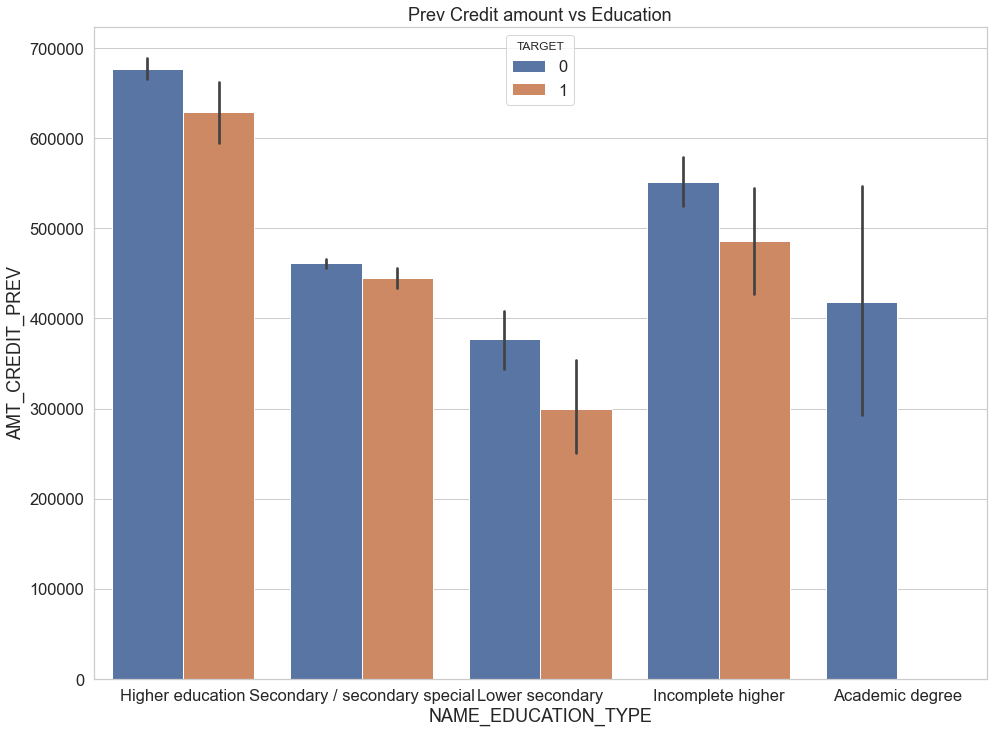

In [67]:
plt.figure(figsize=(16,12))
sns.set(style='whitegrid', font_scale = 1.5)
sns.barplot(data =new_credit_data, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT_PREV',hue='TARGET')
plt.title('Prev Credit amount vs Education')
plt.show()

    The above graph shows that in previous applications, applicants with Higher education had difficulty in paying loan and followed with applicants who have incomplete higher education.
    The second point the above graph indicates is: Applicants with Academic degree do not have any payment difficulties.

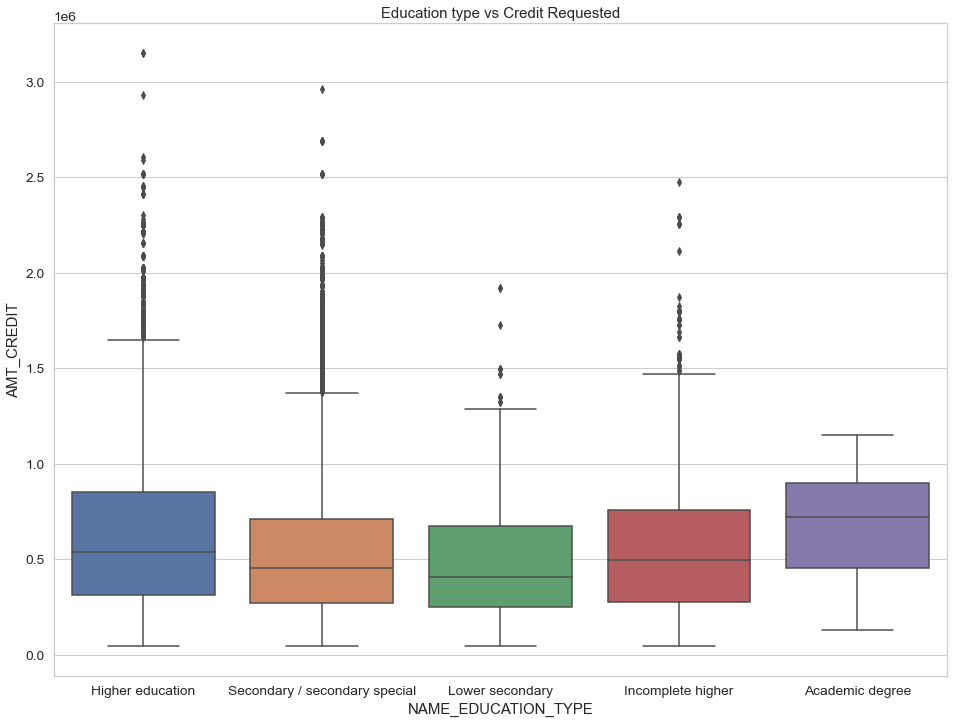

In [68]:
#education type and credit amount boxplot
plt.figure(figsize=(16,12))
sns.set(style='whitegrid', font_scale =1.25)
sns.boxplot(data=new_credit_data, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT')
plt.title('Education type vs Credit Requested')
plt.show()

Conclusion from above graph: 

    As we found from above graphs that Education_type plays huge role in determining Loan Defaulter. This particular graph shows the outliers that falls under Incomplete, Secondary and Higher Education 

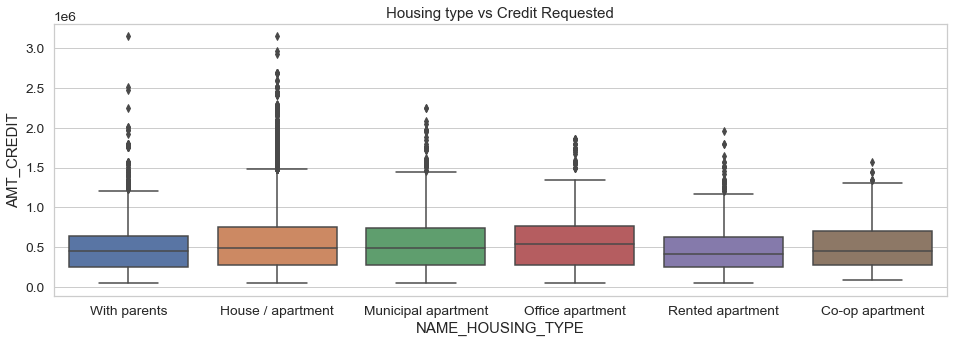

In [69]:
#housing type and credit amount boxplot
plt.figure(figsize=(16,5))
plt.title('Housing type vs Credit Requested')
sns.boxplot(data=new_credit_data, x='NAME_HOUSING_TYPE', y='AMT_CREDIT')
plt.show()

conclusion from above graph:

    This graph show credit asked from bank on terms of house applicants want to buy
    With having outliers in close to every type of housing, but the 2nd and 3rd quartile looks nearly similar and median value also falls at nearly same value

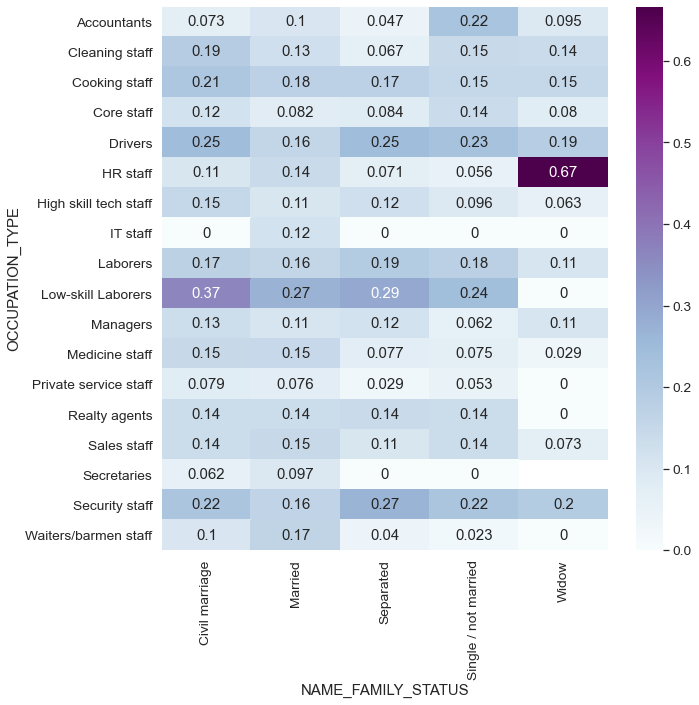

In [70]:
#create the heat map of Job vs marital vs response_flag.
plt.figure(figsize=(10,10))
res1=pd.pivot_table(data=new_credit_data,index='OCCUPATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
sns.heatmap(res1,annot=True, cmap='BuPu')
plt.show()

    Here HR_staff and Widow has highest chances of being a defaulter, also low skilled labours in civil marriage
    IT staff is most successful in paying loan back

## Correlation Map on terms of Target Value for New Credit Data

In [71]:
#defining numerical column for correlation matrix
new_credit_data1 = new_credit_data[['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']]

In [72]:
new_credit_data1.corr().head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.009053,-0.016196,0.015741,0.353676,-0.200765,0.184627,-0.027380,-0.016142,-0.004413,0.009472,0.017863,0.029562,0.070760,0.066061
AMT_INCOME_TOTAL,0.009053,1.000000,0.363042,0.443971,0.011666,-0.109202,0.037644,0.008055,0.080590,0.060171,0.102884,0.093366,-0.001088,-0.005990,-0.002902
AMT_CREDIT,-0.016196,0.363042,1.000000,0.746824,-0.085063,-0.023770,-0.005146,0.004583,0.049877,0.018206,0.031472,0.030247,-0.036609,-0.039617,-0.023212
AMT_ANNUITY,0.015741,0.443971,0.746824,1.000000,0.001328,-0.077019,0.040235,0.025651,0.047232,0.032810,0.061477,0.054830,-0.013785,-0.013887,-0.007295
DAYS_BIRTH,0.353676,0.011666,-0.085063,0.001328,1.000000,-0.543814,0.314206,0.190461,0.042670,0.066530,0.081271,0.053503,0.171800,0.203342,0.119940


[]

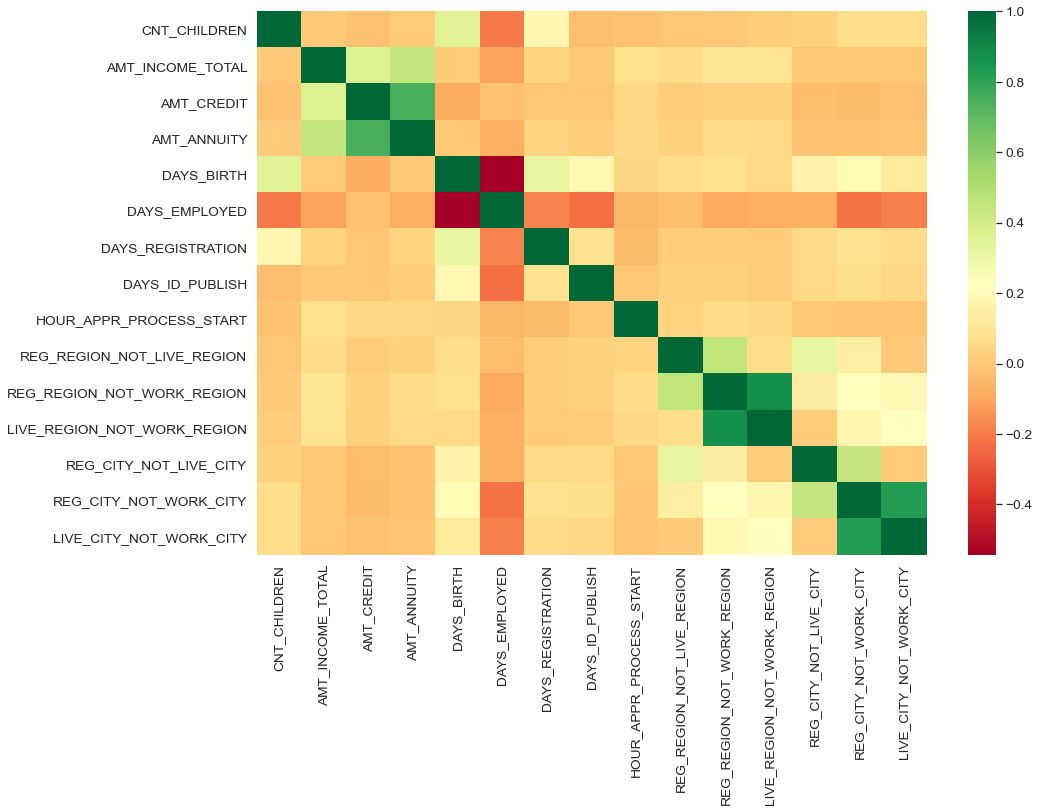

In [73]:
plt.figure(figsize=(15,10))
plt.yticks(rotation=0)
sns.heatmap(new_credit_data1.corr(), cmap='RdYlGn')
plt.plot()

    1.Credit amount is higher for low age applicant and vice-versa.
    2.Total Income is inversely proportional to number of children applicant have
    3.less children client live in densely populated area.
    4.The total income of applicants are higher for peole living in densely populated area.

# Conclusion

### Client with Payment Difficulty:

#### As per the above analysis, below category of clients seems to have payment difficulties the most and could be at the risk of being Defaulter:

1. Clients who have taken loan for the prupose of "Repairs", "Others", "Urgent need" as they are with the most payment difficulty.
2. Clients with Income Type category as Student who have taken loan for the purpose of "Repair" are found to have the most payment difficluties. This could be a reason as there is no income source and high chnace of being a defaulter for such clients.
3. Clients with Occupation Type "Low Skilled Labors" seems to have the most difficulites in paying back the loan. Most of these  clients are of Education Type Secondary/Secondary Special.
4. Clients with Occupation Type Laborers and Education Type Secondary/Secondary Special are at the risk of being defaulter.
5. As per the Gender analysis, number of males with payment difficulties are more as compare to Female.

### Low Risk of Being Defaulter:

1. The applicants whose occupation type is Manager have highest income and could be at no risk of defaulting payments.
2. Clients with Education Type Academic Degree do not have payemnt difficulty and hence could be a low risk of being defaulter.
